In [3]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Cluster Eval

In [4]:
import pandas as pd
import numpy as np

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans, MeanShift
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score

from tqdm.notebook import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


blobs = make_blobs(n_samples=750, centers=4, cluster_std=3.0, random_state=42)
df = pd.DataFrame(blobs[0])
df.head()

,0,1
0,10.822123,7.239192
1,4.681667,1.900794
2,-8.884257,9.061397
3,4.296259,5.686619
4,-8.606541,-6.514080


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

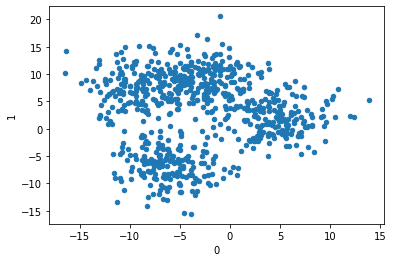

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
df.plot.scatter(0, 1)
plt.show()

In [6]:
scaler = StandardScaler()
scaled = scaler.fit_transform(df)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

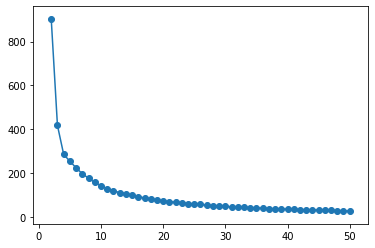

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [10]:
sses = []
ks = range(2, 51)

for k in ks:
    clst = KMeans(k)
    clst.fit(scaled)
    sse = clst.inertia_
    sses.append(sse)

plt.plot(ks, sses)
plt.scatter(ks, sses)
plt.show()

MeanShift Clustering with bandwidth of 0.700.
Red markers are the cluster centers.


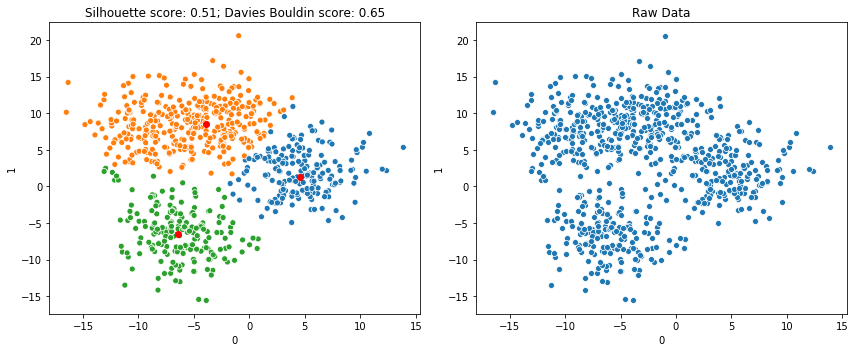


---------------------------------------------

MeanShift Clustering with bandwidth of 0.725.
Red markers are the cluster centers.


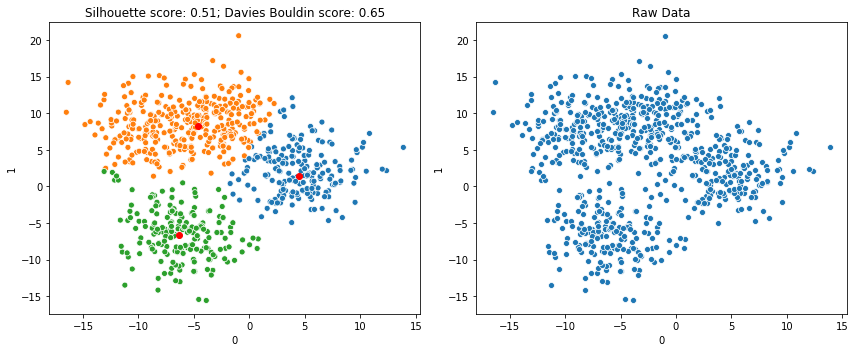


---------------------------------------------

MeanShift Clustering with bandwidth of 0.750.
Red markers are the cluster centers.


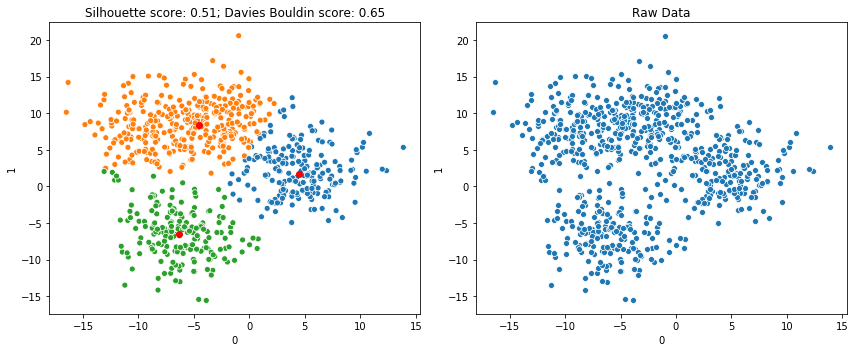


---------------------------------------------

MeanShift Clustering with bandwidth of 0.775.
Red markers are the cluster centers.


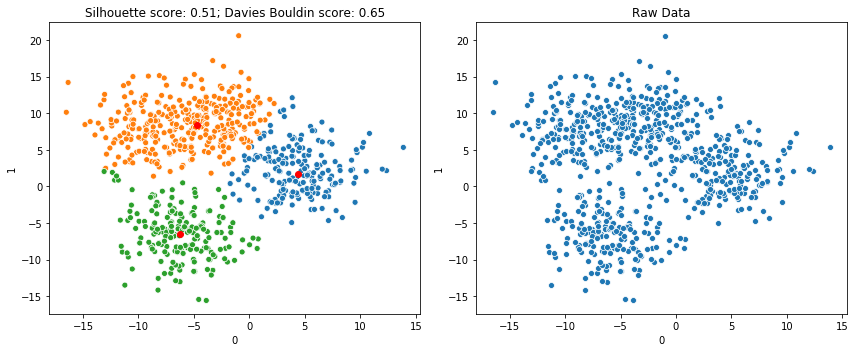


---------------------------------------------

MeanShift Clustering with bandwidth of 0.800.
Red markers are the cluster centers.


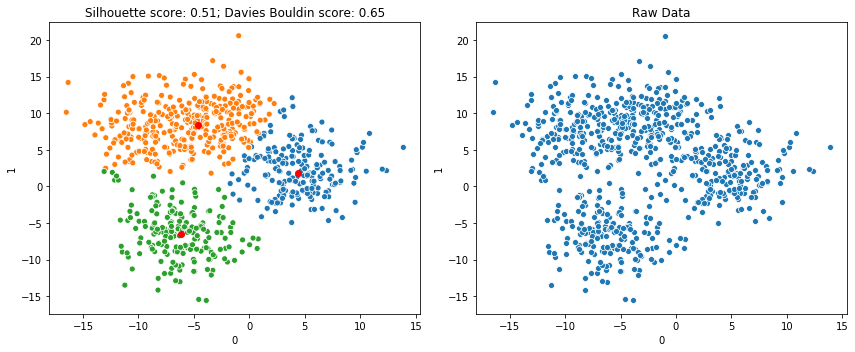


---------------------------------------------




<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
sscores = []
dscores = []
bws = np.arange(0.2, 1.1, 0.1)
bws = [0.7, 0.725, 0.75, 0.775, 0.8]
for bw in tqdm(bws):
    clst = MeanShift(bw)
    clst.fit(scaled)

    sscore = silhouette_score(scaled, clst.labels_)
    dscore = davies_bouldin_score(scaled, clst.labels_)

    sscores.append(sscore)
    dscores.append(dscore)

    df["label"] = clst.labels_
    df["label"] = df["label"].astype(str) + "_"

    unscaled = scaler.inverse_transform(clst.cluster_centers_)
    centroids = pd.DataFrame(unscaled)
    centroids["label"] = "Centroid"

    print(f"MeanShift Clustering with bandwidth of {bw:.3f}.")
    print("Red markers are the cluster centers.")

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))
    sns.scatterplot(0, 1, hue="label", data=df, ax=axes[0])
    axes[0].scatter(centroids[0], centroids[1], c="red")
    axes[0].get_legend().remove()
    axes[0].set_title(
        f"Silhouette score: {sscore:.2f}; Davies Bouldin score: {dscore:.2f}"
    )

    sns.scatterplot(0, 1, data=df, ax=axes[1])
    axes[1].set_title("Raw Data")
    plt.tight_layout()
    plt.show()

    print("\n---------------------------------------------\n")

Best bw according to sil 0.775


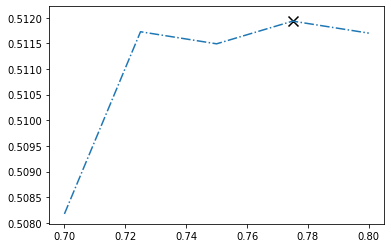

Best bw according to dave 0.7


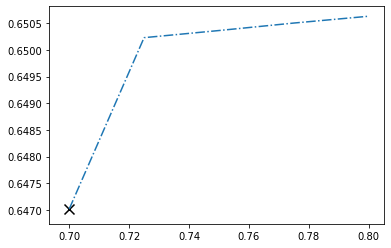

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
best_score = max(sscores)
best_score_bw = bws[sscores.index(best_score)]
print(f"Best bw according to sil {best_score_bw}")
plt.plot(bws, sscores, ls="-.")
plt.scatter(best_score_bw, best_score, marker="x", s=100, c="black")
plt.show()

best_score = min(dscores)
best_score_bw = bws[dscores.index(best_score)]
print(f"Best bw according to dave {best_score_bw}")
plt.plot(bws, dscores, ls="-.")
plt.scatter(best_score_bw, best_score, marker="x", s=100, c="black")
plt.show()